<h2>Distribution of the differences in 13 important feature values in the two sub-regions</h2>

<h3>This script corresponds to the "Differences in the features of the two sub-regions" section in our manuscript.</h3>

In [1]:
import re, os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Above_intergenicfea = []     
Above_intronfea = []
Above_downstream_gene_variantfea = []
Above_upstream_gene_variantfea = []
Above_regulatory_region_variantfea = []
Above_three_prime_UTR_variantfea = []
Above_five_prime_UTR_variantfea = []
Above_splicing_variantfea = []

Under_intergenicfea = []     
Under_intronfea = []
Under_downstream_gene_variantfea = []
Under_upstream_gene_variantfea = []
Under_regulatory_region_variantfea = []
Under_three_prime_UTR_variantfea = []
Under_five_prime_UTR_variantfea = []
Under_splicing_variantfea = []

<h4>Pick out the 13 most important features from the file ("terms_score_Fea_datasets").</h4>

In [3]:
def splitVariants(filepath, sep = "\t"):
    f = open(filepath+"/terms_score_Fea_datasets",'rt')
    for line in f:
        line = line.strip()
        if line.startswith("chromID"):
            continue
        li = re.split(sep, line)
        terms = li[6]
        score = float(li[5])
        imporFea = [float(li[940])]+[float(li[925])]+[float(li[941])]+[float(li[939])]+[float(li[-14])]+[float(li[-13])]+[float(li[-10])]+[float(li[-8])]+[float(li[-11])]+[float(li[-6])]+[float(li[-7])]+[float(li[-12])]+[float(li[-2])]
        if score>=0.256:
            if terms == "intergenic":
                Above_intergenicfea.append(imporFea)
            if terms == "intron":
                Above_intronfea.append(imporFea)
            if terms == "downstream_gene":
                Above_downstream_gene_variantfea.append(imporFea)
            if terms == "upstream_gene":
                Above_upstream_gene_variantfea.append(imporFea)
            if terms == "regulatory_region":
                Above_regulatory_region_variantfea.append(imporFea)
            if terms == "3_prime_UTR":
                Above_three_prime_UTR_variantfea.append(imporFea)
            if terms == "5_prime_UTR":
                Above_five_prime_UTR_variantfea.append(imporFea)
            if terms == "splicing":
                Above_splicing_variantfea.append(imporFea)
        else:
            if terms == "intergenic":
                Under_intergenicfea.append(imporFea)
            if terms == "intron":
                Under_intronfea.append(imporFea)
            if terms == "downstream_gene":
                Under_downstream_gene_variantfea.append(imporFea)
            if terms == "upstream_gene":
                Under_upstream_gene_variantfea.append(imporFea)
            if terms == "regulatory_region":
                Under_regulatory_region_variantfea.append(imporFea)
            if terms == "3_prime_UTR":
                Under_three_prime_UTR_variantfea.append(imporFea)
            if terms == "5_prime_UTR":
                Under_five_prime_UTR_variantfea.append(imporFea)
            if terms == "splicing":
                Under_splicing_variantfea.append(imporFea)
splitVariants(filepath="../Classifier score across human non-coding regions", sep = "\t")

<h4>In every region, the averages of the 13 features that were found to be the most important in our model (see section “Contribution of individual features” for details) were calculated, and finally 13✖2✖8 average values were generated.</h4>

<h4>The values were assigned to two matrices of size 13*8 according to the cutoff. </h4>

In [4]:
above_eightTermsMeanFea = []
def MeanAbove_imporFea(termslist):
    for i in termslist:
        I = np.array(i.copy())
        for m in range(I.shape[1]):
            I_col = I[:,m]
            I_mean_col = I_col.sum()/I.shape[0]
            above_eightTermsMeanFea.append(I_mean_col)

MeanAbove_imporFea(termslist = [Above_intergenicfea,Above_intronfea,
                                Above_downstream_gene_variantfea,Above_upstream_gene_variantfea,
                                Above_regulatory_region_variantfea,Above_three_prime_UTR_variantfea,
                                Above_five_prime_UTR_variantfea,Above_splicing_variantfea])


under_eightTermsMeanFea = []
def MeanUnder_imporFea(termslist):
    for i in termslist:
        I = np.array(i.copy())
        for m in range(I.shape[1]):
            I_col = I[:,m]
            I_mean_col = I_col.sum()/I.shape[0]
            under_eightTermsMeanFea.append(I_mean_col)

MeanUnder_imporFea(termslist = [Under_intergenicfea,Under_intronfea,
                                Under_downstream_gene_variantfea,Under_upstream_gene_variantfea,
                                Under_regulatory_region_variantfea,Under_three_prime_UTR_variantfea,
                                Under_five_prime_UTR_variantfea,Under_splicing_variantfea])

<h4>The two matrices were normalized by z-score twice: first, the row (feature) in every matrix was normalized to eliminate the magnitude, and second, the column (variant group) was normalized to make every feature in a variant group comparable.</h4>

In [5]:
Above_eightTerms_meanFeature = np.array(above_eightTermsMeanFea).reshape(8,13)
Under_eightTerms_meanFeature = np.array(under_eightTermsMeanFea).reshape(8,13)

Above_normalizationArray = Above_eightTerms_meanFeature.copy()
Under_normalizationArray = Under_eightTerms_meanFeature.copy()


In [6]:
##above
def AboveCol_Row_Normalization():
    for index in range(Above_normalizationArray.shape[1]):
        c_col = Above_normalizationArray[:,index]
        if np.std(c_col) == 0:
            Above_normalizationArray[:,index] = 0
        else:
            c_col = (c_col-np.mean(c_col))/np.std(c_col)
            Above_normalizationArray[:,index] = c_col
    Above_normalizationArray2 = Above_normalizationArray.copy()
    for r in range(Above_normalizationArray2.shape[0]):
        c_row = Above_normalizationArray2[r,:]
        if np.std(c_row) == 0:
            Above_normalizationArray2[r,:] = 0
        else:
            c_row = (c_row-np.mean(c_row))/np.std(c_row)
            Above_normalizationArray2[r,:] = c_row
    return Above_normalizationArray2


Above_normalizationArray2 = AboveCol_Row_Normalization()
##under
def UnderCol_Row_Normalization():
    for index in range(Under_normalizationArray.shape[1]):
        c_col = Under_normalizationArray[:,index]
        if np.std(c_col) == 0:
            Under_normalizationArray[:,index] = 0
        else:
            c_col = (c_col-np.mean(c_col))/np.std(c_col)
            Under_normalizationArray[:,index] = c_col
    Under_normalizationArray2 = Under_normalizationArray.copy()
    for r in range(Under_normalizationArray2.shape[0]):
        c_row = Under_normalizationArray2[r,:]
        if np.std(c_row) == 0:
            Under_normalizationArray2[r,:] = 0
        else:
            c_row = (c_row-np.mean(c_row))/np.std(c_row)
            Under_normalizationArray2[r,:] = c_row
    return Under_normalizationArray2

Under_normalizationArray2 = UnderCol_Row_Normalization()



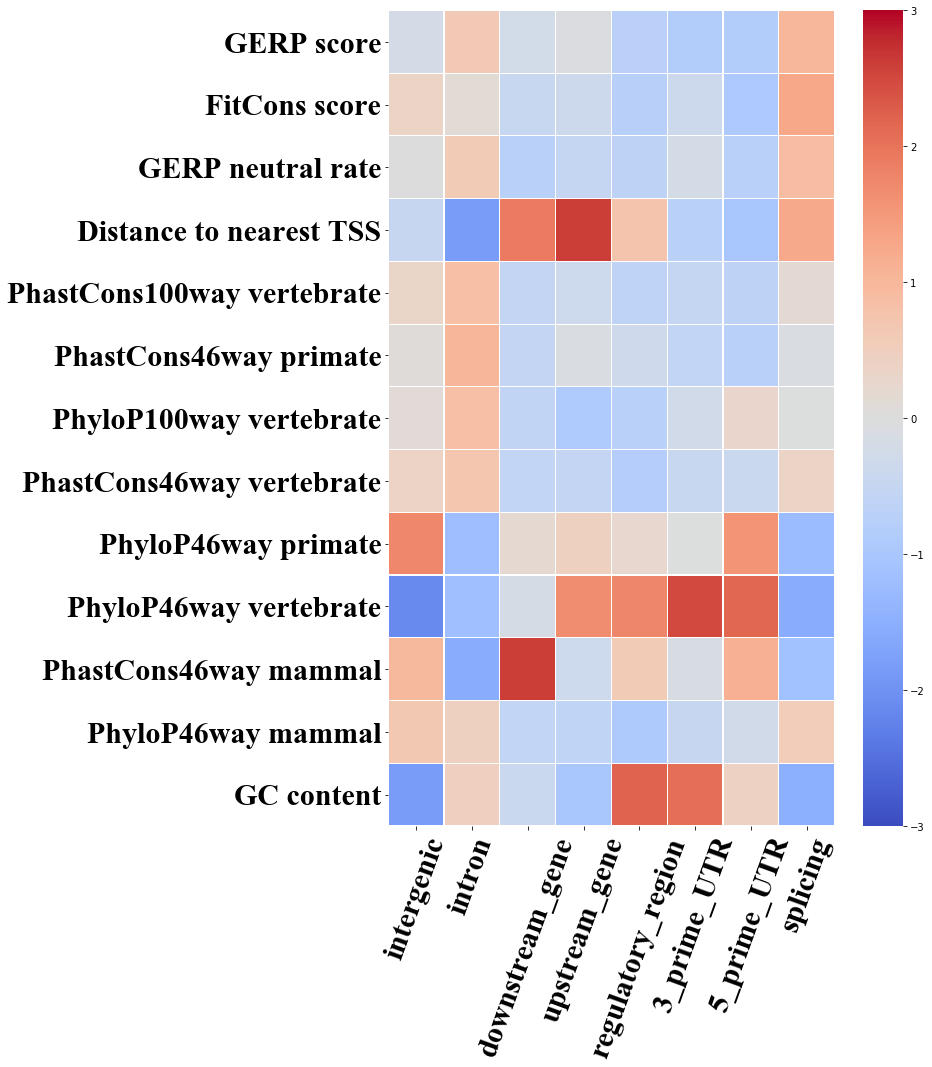

In [7]:
data1 = pd.DataFrame(Above_normalizationArray2.transpose())
data1.index = ["GERP score","FitCons score","GERP neutral rate","Distance to nearest TSS","PhastCons100way vertebrate","PhastCons46way primate","PhyloP100way vertebrate","PhastCons46way vertebrate","PhyloP46way primate","PhyloP46way vertebrate","PhastCons46way mammal","PhyloP46way mammal","GC content"]
data1.columns = ["intergenic","intron","downstream_gene","upstream_gene","regulatory_region","3_prime_UTR","5_prime_UTR","splicing"]
plt.figure(figsize=(10,15))
sns.heatmap(data1,linewidths = 0.05, robust=True, cmap="coolwarm", vmin = -3, vmax = 3)
plt.yticks(fontproperties = 'Times New Roman', size = 30)
plt.xticks(fontproperties = 'Times New Roman', size = 30, rotation=70)
plt.show()

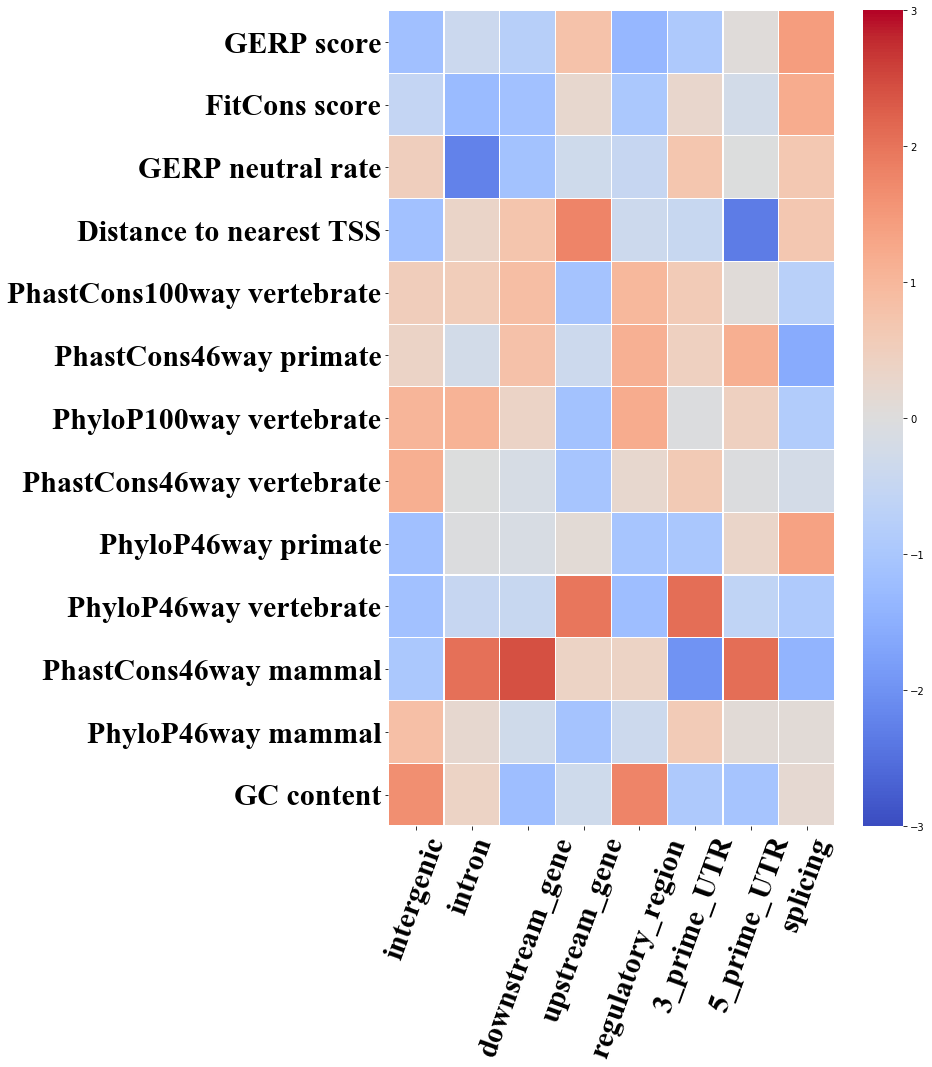

In [8]:
data2 = pd.DataFrame(Under_normalizationArray2.transpose())
data2.index = ["GERP score","FitCons score","GERP neutral rate","Distance to nearest TSS","PhastCons100way vertebrate","PhastCons46way primate","PhyloP100way vertebrate","PhastCons46way vertebrate","PhyloP46way primate","PhyloP46way vertebrate","PhastCons46way mammal","PhyloP46way mammal","GC content"]
data2.columns = ["intergenic","intron","downstream_gene","upstream_gene","regulatory_region","3_prime_UTR","5_prime_UTR","splicing"]
plt.figure(figsize=(10,15))
sns.heatmap(data2,linewidths = 0.05, robust=True, cmap="coolwarm", vmin = -3, vmax = 3)
plt.yticks(fontproperties = 'Times New Roman', size = 30)
plt.xticks(fontproperties = 'Times New Roman', size = 30, rotation=70)
plt.show()

<h4>ABOVE-BELOW</h4>

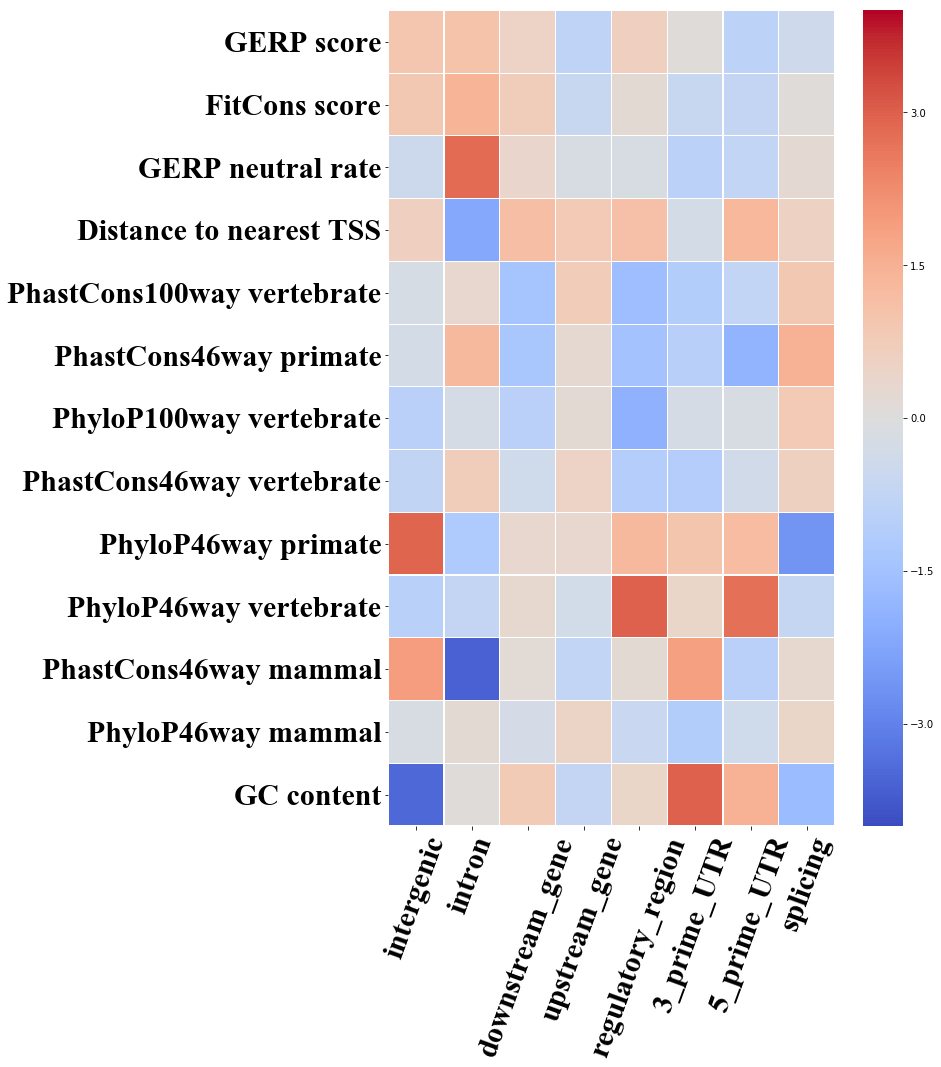

In [9]:
Difference = (Above_normalizationArray2-Under_normalizationArray2).transpose()
data_differ = pd.DataFrame(Difference)
data_differ.index = ["GERP score","FitCons score","GERP neutral rate","Distance to nearest TSS","PhastCons100way vertebrate","PhastCons46way primate","PhyloP100way vertebrate","PhastCons46way vertebrate","PhyloP46way primate","PhyloP46way vertebrate","PhastCons46way mammal","PhyloP46way mammal","GC content"]
data_differ.columns = ["intergenic","intron","downstream_gene","upstream_gene","regulatory_region","3_prime_UTR","5_prime_UTR","splicing"]
plt.figure(figsize=(10,15))
sns.heatmap(data_differ,linewidths = 0.05, robust=True, cmap="coolwarm", vmin = -4, vmax = 4)
plt.yticks(fontproperties = 'Times New Roman', size = 30)
plt.xticks(fontproperties = 'Times New Roman', size = 30,rotation = 70)
plt.show()